# Figures and statistics

Endogenous Rhythmic Attention project, 2019-2023

<b>Author</b>: Olof J. van der Werf
<br><b>Last updated</b>: 04-08-2023

### Purpose of this notebook

This notebook visualises the outcomes of the stLSS analysis and calculates statistics.

### Import necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as signal
import scipy.stats as stats
from scipy.signal import butter,lfilter

### Variables

In [2]:
# folders
results_folder = 'data/results/'
figure_folder = 'figures/'

# time bins
start_time = 0.490
end_time = 1.690
resolution = 0.001
num_time_bins = int((end_time - start_time) / resolution) + 2
intervals = np.round(np.linspace(start_time, end_time, num = num_time_bins),3)

# frequency bins
low_freq = 2
high_freq = 20
resolution = 0.1
num_freq_bins = int((high_freq - low_freq) / resolution) + 1
frequencies =  np.linspace(low_freq, high_freq, num = num_freq_bins)

# Variables
validities = ['valid','invalid']
visual_fields = ['left','right','both']
conditions = ['60','80','100']

subjects = ['03','04','05','06','09','11','12','14','15','17','18','19','20','21','26','27','30','31','32','33','34','35','37','38','39','40']

### Import data
Import time series, observed power spectra and surrogate power spectra 

In [3]:
# Import time series
time_series = {}

for validity in validities:
    time_series[validity] = {}
        
    for visual_field in visual_fields:
        time_series[validity][visual_field] = {}
        
        for condition in conditions:  
            if validity == 'invalid' and condition == '100':
                continue
                
            time_series_file = results_folder +'time_series/'+validity+'_'+visual_field+'_'+condition+'.csv'
            ts = pd.read_csv(time_series_file, sep = ',',index_col=0).squeeze("columns")
            
            # detrend
            detrended = signal.detrend(ts, axis=0, type='linear')
            detrended = pd.Series(detrended, index = ts.index)
            
            # Add to time series dictionary
            time_series[validity][visual_field][condition] = detrended

In [4]:
# Import power spectra
power_spectrum = {}
for validity in validities:
    power_spectrum[validity] = {}
    for visual_field in visual_fields:
        power_spectrum[validity][visual_field] = {}
        for condition in conditions:
            if validity == 'invalid' and condition == '100':
                continue
                
            file = results_folder + 'power_spectra/' + validity + '_' + visual_field + '_' + condition + '.csv'
            power_spectrum[validity][visual_field][condition] = pd.read_csv(file,index_col = 0)

There is a sampling artifact in the power spectrum in the 80% cue validity condition, for invalid trials, when left and right visual fields separately:

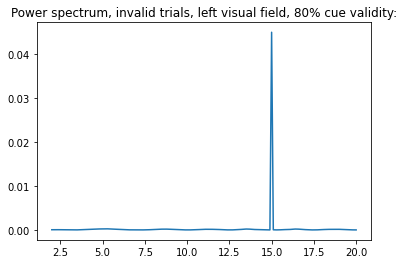

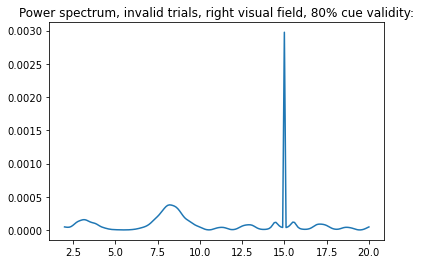

In [5]:
# plot power spectra
plt.plot(power_spectrum['invalid']['left']['80'])
plt.title('Power spectrum, invalid trials, left visual field, 80% cue validity:')
plt.show()
plt.plot(power_spectrum['invalid']['right']['80'])
plt.title('Power spectrum, invalid trials, right visual field, 80% cue validity:')
plt.show()

Thus, we will numb out the data (put in 'NaN') at 15.0 Hz, so as to not disturb plotting and comparison against the surrogate power spectra.

In [6]:
# make sure that 15 Hz artifact is numbed out
power_spectrum['invalid']['left']['80'].loc[15.0] = np.nan
power_spectrum['invalid']['right']['80'].loc[15.0] = np.nan

In [7]:
# Import surrogate power spectra - interval labels
surrogate_power_spectrum = {}
for validity in validities:
    surrogate_power_spectrum[validity] = {}
    for visual_field in visual_fields:
        surrogate_power_spectrum[validity][visual_field] = {}
        for condition in conditions:
            if validity == 'invalid' and condition == '100':
                continue
                
            file = results_folder + 'permutations/interval_permutations/' + validity + '_' + visual_field + '_' + condition +'.csv'
            surrogate_power_spectrum[validity][visual_field][condition] = pd.read_csv(file, index_col = 0)

Same for the surrogate power spectrum: we will numb out the data (put in 'NaN') at 15.0 Hz, so as to not disturb plotting and comparison with the observed power spectrum.

In [8]:
# make sure that 15 Hz artifact is numbed out
surrogate_power_spectrum['invalid']['left']['80'].loc[15.0] = np.nan
surrogate_power_spectrum['invalid']['right']['80'].loc[15.0] = np.nan

In [9]:
# Import surrogate power spectra - condition labels
surrogate_power_spectrum_conditions = {}
for visual_field in visual_fields:
    surrogate_power_spectrum_conditions[visual_field] = {}
    for condition in conditions:

        file = results_folder + 'permutations/condition_permutations/valid_' + visual_field + '_' + condition +'.csv'
        surrogate_power_spectrum_conditions[visual_field][condition] = pd.read_csv(file, index_col = 0)


### Plot figures

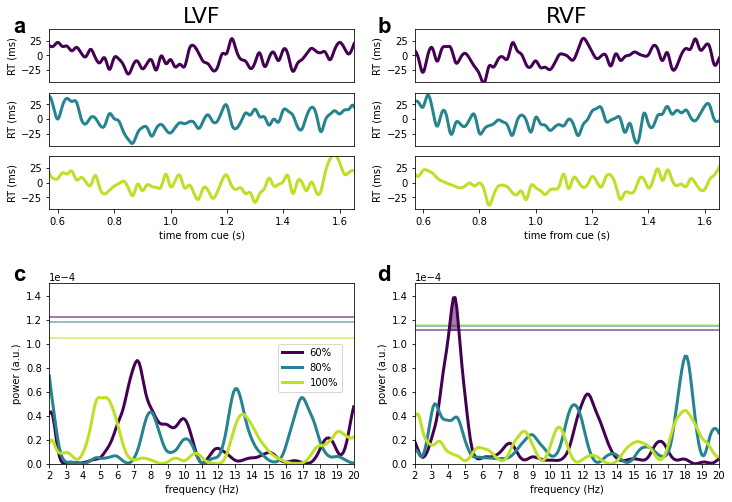

In [10]:
# Figure 2 (Results at the cued location)
# Plotting variables
ylim = [0,0.00015]
xlim = [2,20]

linewidth = 3

zorders = [3,2,1]

ts_xlim = [0.57,1.65]
ts_ylim = [-45,45]

colors = plt.cm.viridis(np.linspace(0, 0.9, len(conditions)))

fig = plt.figure(figsize=(12,8))
gs = fig.add_gridspec(7, 2)

# A. time course LVF
for idx,condition in enumerate(conditions):
    ax = fig.add_subplot(gs[idx, 0])

    plt.plot(time_series['valid']['left'][condition],color=colors[idx],linewidth=linewidth,zorder = zorders[idx],alpha = 1)

    plt.ylim(ts_ylim)
    plt.xlim(ts_xlim)
        
    if idx == 0:
        plt.title('LVF',size=22)
        ax.text(-0.1, 1.05,'a', ha='center', va='center', transform=ax.transAxes, font = 'arial', size = 22, weight='bold')
    if idx < 2:
        plt.xlabel('')
        plt.ylabel('')
        plt.xticks([])
    elif idx == 2:
        plt.xlabel('time from cue (s)')
    plt.ylabel('RT (ms)')
        

# B. time course RVF  
for idx,condition in enumerate(conditions):
    ax = fig.add_subplot(gs[idx, 1])

    plt.plot(time_series['valid']['right'][condition],color=colors[idx],linewidth=linewidth,zorder = zorders[idx],alpha = 1)

    plt.ylim(ts_ylim)
    plt.xlim(ts_xlim)
        
    if idx == 0:
        plt.title('RVF',size=22)
        ax.text(-0.1, 1.05,'b', ha='center', va='center', transform=ax.transAxes, font = 'arial', size = 22, weight='bold')
    if idx < 2:
        plt.xlabel('')
        plt.ylabel('')
        plt.xticks([])
    elif idx == 2:
        plt.xlabel('time from cue (s)')
    plt.ylabel('RT (ms)')

# C. Power spectrum LVF 
ax3 = fig.add_subplot(gs[4:7, 0])
ax3.text(-0.1, 1.05,'c', ha='center', va='center', transform=ax3.transAxes, font = 'arial', size = 22, weight='bold')

for idx,condition in enumerate(conditions):
    y = power_spectrum['valid']['left'][condition]['0'].to_numpy()
    threshold = np.quantile(surrogate_power_spectrum['valid']['left'][condition].max(axis = 0),0.95)
    plt.plot(frequencies,y,color=colors[idx],linewidth = linewidth,alpha = 1)
    
    colors[idx][3] = 0.5
    plt.axhline(threshold,color=colors[idx],linewidth = 2, zorder = 1, label='_nolegend_')
    plt.fill_between(frequencies, threshold, y, where = y >= threshold, edgecolor=colors[idx], alpha=0.5, label='_nolegend_')

    plt.xticks(np.arange(min(frequencies), max(frequencies)+1, 1.0))
    plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.xlabel('frequency (Hz)')
    plt.ylabel('power (a.u.)')

# legend
plt.legend(['60%', '80%', '100%'], loc = [0.75,0.40], prop={'size': 10})

# D. Power spectrum RVF 
lines = {}
ax4 = fig.add_subplot(gs[4:7, 1])
ax4.text(-0.1, 1.05,'d', ha='center', va='center', transform=ax4.transAxes, font = 'arial', size = 22, weight='bold')

for idx,condition in enumerate(conditions):
    
    # plot power spectrum
    y = power_spectrum['valid']['right'][condition]['0'].to_numpy()
    threshold = np.quantile(surrogate_power_spectrum['valid']['right'][condition].max(axis = 0),0.95)
    plt.plot(frequencies,y,color=colors[idx],linewidth = linewidth,alpha = 1)
    
    colors[idx][3] = 0.5
    plt.axhline(threshold,color=colors[idx],linewidth = 2, zorder=1,label='_nolegend_')
    plt.fill_between(frequencies, threshold, y, where = y >= threshold, color=colors[idx], alpha=0.5,zorder = 2,label='_nolegend_')
    
    plt.xticks(np.arange(min(frequencies), max(frequencies)+1, 1.0))
    plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.xlabel('frequency (Hz)')
    plt.ylabel('power (a.u.)')
    
plt.savefig(figure_folder+'figure_3.png',dpi = 300)

<b> Figure 2</b>: Attentional orienting is rhythmic, depending on cue validity. (a-b) Time courses of reaction times across cue-to-target intervals (mean ± standard error of measurement (SEM)) at validly cued locations on the LVF (a) and the RVF (b). Time courses are constructed using a Gaussian moving kernel across cue-to-target intervals. (c-d) Power spectra respectively corresponding to the time courses in A and B, as yielded from the stLSS analysis. Horizontal lines in corresponding colours denote the 95th percentile of the maximum permutation spectrum (i.e. Max-Based correction for multiple comparisons). Reaction times to targets in the RVF fluctuated significantly at ~4 Hz in the low cue validity (60%) condition (Ppeak = 0.013 at 4.4 Hz).

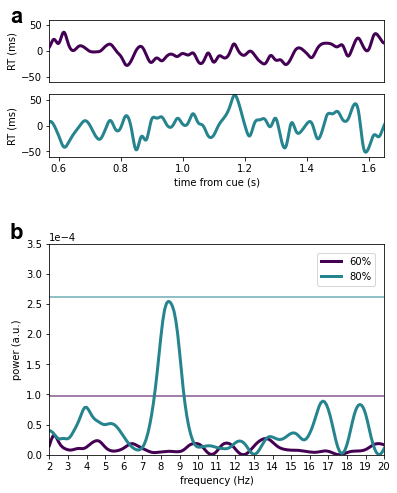

In [11]:
# Figure 3 (Results at the non-cued location)
ylim = [0,0.00035]
xlim = [2,20]

linewidth = 3

zorders = [3,2,1]

ts_xlim = [0.57,1.65]
ts_ylim = [-60,60]

colors = plt.cm.viridis(np.linspace(0, 0.9, len(conditions)))

fig = plt.figure(figsize=(6,8))
gs = fig.add_gridspec(6, 1)

# A. time series
for idx,condition in enumerate(conditions[:2]):
    ax = fig.add_subplot(gs[idx,0])

    plt.plot(intervals,time_series['invalid']['both'][condition],color=colors[idx],linewidth=linewidth,zorder = zorders[idx],alpha = 1)

    plt.ylim(ts_ylim)
    plt.xlim(ts_xlim)
        
    if idx == 0:
        ax.text(-0.1, 1.05,'a', ha='center', va='center', transform=ax.transAxes, font = 'arial', size = 22, weight='bold')
    if idx < 1:
        plt.xlabel('')
        plt.ylabel('')
        plt.xticks([])
    elif idx == 1:
        plt.xlabel('time from cue (s)')
    plt.ylabel('RT (ms)')

# D. Power spectrum RVF 
lines = {}
ax4 = fig.add_subplot(gs[3:, 0])
ax4.text(-0.1, 1.05,'b', ha='center', va='center', transform=ax4.transAxes, font = 'arial', size = 22, weight='bold')

for idx,condition in enumerate(conditions[:2]):
    
    # plot power spectrum
    y = power_spectrum['invalid']['both'][condition]['0'].to_numpy()
    threshold = np.quantile(surrogate_power_spectrum['invalid']['both'][condition].max(axis = 0),0.95)
    plt.plot(frequencies,y,color=colors[idx],linewidth = linewidth, alpha = 1)
    
    colors[idx][3] = 0.5
    plt.axhline(threshold,color=colors[idx],linewidth = 2, zorder=1,label='_nolegend_')
    plt.fill_between(frequencies, threshold, y, where = y >= threshold, color=colors[idx], alpha=0.5,zorder = 2,label='_nolegend_')
    
    plt.xticks(np.arange(min(frequencies), max(frequencies)+1, 1.0))
    plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.xlabel('frequency (Hz)')
    plt.ylabel('power (a.u.)')
    
# legend
plt.legend(['60%', '80%'], loc = [0.8,0.8])

plt.savefig(figure_folder+'figure_4.png',dpi = 300)

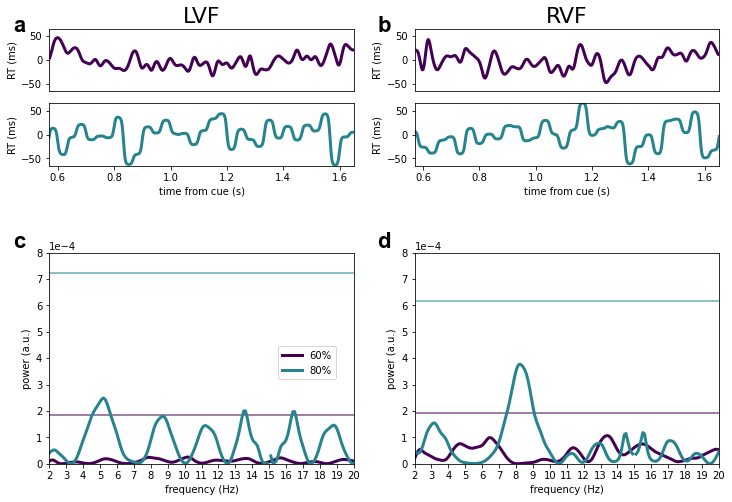

In [12]:
# Supplementary figure 2 
# Plotting variables
xlim = [2,20]
ylim = [0,0.0008]

linewidth = 3

zorders = [3,2,1]

ts_xlim = [0.57,1.65]
ts_ylim = [-65,65]

colors = plt.cm.viridis(np.linspace(0, 0.9, len(conditions)))

fig = plt.figure(figsize=(12,8))
gs = fig.add_gridspec(6, 2)

# A. time course LVF
for idx,condition in enumerate(conditions[:2]):
    ax = fig.add_subplot(gs[idx, 0])
    
    plt.plot(intervals,time_series['invalid']['left'][condition],color=colors[idx],linewidth=linewidth,zorder = zorders[idx],alpha = 1)

    plt.ylim(ts_ylim)
    plt.xlim(ts_xlim)
        
    if idx == 0:
        plt.title('LVF',size=22)
        ax.text(-0.1, 1.05,'a', ha='center', va='center', transform=ax.transAxes, font = 'arial', size = 22, weight='bold')
    if idx < 1:
        plt.xlabel('')
        plt.ylabel('')
        plt.xticks([])
    elif idx == 1:
        plt.xlabel('time from cue (s)')
    plt.ylabel('RT (ms)')
        
# B. time course RVF  
for idx,condition in enumerate(conditions[:2]):
    ax = fig.add_subplot(gs[idx, 1])

    plt.plot(intervals,time_series['invalid']['right'][condition],color=colors[idx],linewidth=linewidth,zorder = zorders[idx],alpha = 1)

    plt.ylim(ts_ylim)
    plt.xlim(ts_xlim)
        
    if idx == 0:
        plt.title('RVF',size=22)
        ax.text(-0.1, 1.05,'b', ha='center', va='center', transform=ax.transAxes, font = 'arial', size = 22, weight='bold')
    if idx < 1:
        plt.xlabel('')
        plt.ylabel('')
        plt.xticks([])
    elif idx == 1:
        plt.xlabel('time from cue (s)')
    plt.ylabel('RT (ms)')

# C. Power spectrum LVF 
ax3 = fig.add_subplot(gs[3:6, 0])
ax3.text(-0.1, 1.05,'c', ha='center', va='center', transform=ax3.transAxes, font = 'arial', size = 22, weight='bold')

for idx,condition in enumerate(conditions[:2]):
    y = power_spectrum['invalid']['left'][condition]['0'].to_numpy()
    threshold = np.quantile(surrogate_power_spectrum['invalid']['left'][condition].max(axis = 0),0.95)
    plt.plot(frequencies,y,color=colors[idx],linewidth = linewidth,alpha = 1)
    
    colors[idx][3] = 0.5
    plt.axhline(threshold,color=colors[idx],linewidth = 2, zorder = 1, label='_nolegend_')
    plt.fill_between(frequencies, threshold, y, where = y >= threshold, edgecolor=colors[idx], alpha=0.5, label='_nolegend_')

    plt.xticks(np.arange(min(frequencies), max(frequencies)+1, 1.0))
    plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.xlabel('frequency (Hz)')
    plt.ylabel('power (a.u.)')

# legend
plt.legend(['60%', '80%', '100%'], loc = [0.75,0.40], prop={'size': 10})

# D. Power spectrum RVF 
lines = {}
ax4 = fig.add_subplot(gs[3:6, 1])
ax4.text(-0.1, 1.05,'d', ha='center', va='center', transform=ax4.transAxes, font = 'arial', size = 22, weight='bold')

for idx,condition in enumerate(conditions[:2]):
    
    # plot power spectrum
    y = power_spectrum['invalid']['right'][condition]['0'].to_numpy()
    threshold = np.quantile(surrogate_power_spectrum['invalid']['right'][condition].max(axis = 0),0.95)
    plt.plot(frequencies,y,color=colors[idx],linewidth = linewidth,alpha = 1)
    
    colors[idx][3] = 0.5
    plt.axhline(threshold,color=colors[idx],linewidth = 2, zorder=1,label='_nolegend_')
    plt.fill_between(frequencies, threshold, y, where = y >= threshold, color=colors[idx], alpha=0.5,zorder = 2,label='_nolegend_')
    
    plt.xticks(np.arange(min(frequencies), max(frequencies)+1, 1.0))
    plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.xlabel('frequency (Hz)')
    plt.ylabel('power (a.u.)')

plt.savefig(figure_folder+'supplementary_figure_2.png',dpi = 300)

### Calculate statistics
Calculating statistics: comparing observed power spectra against the surrogate power spectra, where cue-target interval bin labels are shuffled

In [13]:
# Calculate statistics - interval label permutations
for validity in validities:
    for visual_field in visual_fields:
        for condition in conditions:
            
            if validity == 'invalid' and condition == '100':
                continue
                
            print('For '+validity+', '+visual_field+', '+condition+': ')
            # peak at...
            peak_value = power_spectrum[validity][visual_field][condition].max()[0]
            freq = power_spectrum[validity][visual_field][condition].idxmax()[0]
            print('Peak of '+str(peak_value)+' at '+str(freq)+' Hz.')
            non_corrected = 1 - (stats.percentileofscore(surrogate_power_spectrum[validity][visual_field][condition].loc[freq],peak_value)/100)
            print('Non corrected p:'+str(non_corrected))
            max_based = 1 - (stats.percentileofscore(surrogate_power_spectrum[validity][visual_field][condition].max(axis = 0),peak_value)/100)
            print('Max-based corrected p:'+str(max_based))
            pval = pd.Series(index=frequencies,dtype='float64')
            for freq in power_spectrum[validity][visual_field][condition].index:
                pval.loc[freq] = 1 - stats.percentileofscore(surrogate_power_spectrum[validity][visual_field][condition].max(axis = 0),power_spectrum[validity][visual_field][condition].loc[freq][0])/100

            print('Significant peak frequencies:')
            print(list(pval[pval <= 0.05].index))
            

For valid, left, 60: 
Peak of 8.592245480672781e-05 at 7.2 Hz.
Non corrected p:0.010000000000000009
Max-based corrected p:0.22999999999999998
Significant peak frequencies:
[]
For valid, left, 80: 
Peak of 7.314513815077629e-05 at 2.0 Hz.
Non corrected p:0.02400000000000002
Max-based corrected p:0.366
Significant peak frequencies:
[]
For valid, left, 100: 
Peak of 5.515500866895408e-05 at 5.300000000000001 Hz.
Non corrected p:0.03299999999999992
Max-based corrected p:0.5489999999999999
Significant peak frequencies:
[]
For valid, right, 60: 
Peak of 0.0001383237950752 at 4.4 Hz.
Non corrected p:0.0
Max-based corrected p:0.015999999999999903
Significant peak frequencies:
[4.1, 4.2, 4.300000000000001, 4.4, 4.5, 4.6]
For valid, right, 80: 
Peak of 8.95424288504507e-05 at 18.0 Hz.
Non corrected p:0.007000000000000006
Max-based corrected p:0.16599999999999993
Significant peak frequencies:
[]
For valid, right, 100: 
Peak of 4.439677730601571e-05 at 18.0 Hz.
Non corrected p:0.07799999999999996


Comparing observed power spectra against the surrogate power spectra, where condition labels are shuffled

In [14]:
# Calculate statistics - condition label permutations
for visual_field in visual_fields:
    for condition in conditions:
        print('For '+visual_field+', '+condition+':')
        # peak at...
        peak_value = power_spectrum['valid'][visual_field][condition].max()[0]
        freq = power_spectrum['valid'][visual_field][condition].idxmax()[0]
        print('Peak of '+str(peak_value)+' at '+str(freq)+' Hz.')
        non_corrected = 1 - (stats.percentileofscore(surrogate_power_spectrum_conditions[visual_field][condition].loc[freq],peak_value)/100)
        print('Non corrected:'+str(non_corrected))
        max_based = 1 - (stats.percentileofscore(surrogate_power_spectrum_conditions[visual_field][condition].max(axis = 0),peak_value)/100)
        print('Max-based:'+str(max_based))
        pval = pd.Series(index=power_spectrum['valid'][visual_field][condition].index,dtype='float64')
        for freq in power_spectrum['valid'][visual_field][condition].index:
            pval.loc[freq] = 1 - stats.percentileofscore(surrogate_power_spectrum_conditions[visual_field][condition].max(axis = 0),power_spectrum['valid'][visual_field][condition].loc[freq][0])/100

        print('Significant peak frequencies:')
        print(list(pval[pval <= 0.05].index))

For left, 60:
Peak of 8.592245480672781e-05 at 7.2 Hz.
Non corrected:0.020000000000000018
Max-based:0.263
Significant peak frequencies:
[]
For left, 80:
Peak of 7.314513815077629e-05 at 2.0 Hz.
Non corrected:0.09999999999999998
Max-based:0.43899999999999995
Significant peak frequencies:
[]
For left, 100:
Peak of 5.515500866895408e-05 at 5.300000000000001 Hz.
Non corrected:0.06900000000000006
Max-based:0.764
Significant peak frequencies:
[]
For right, 60:
Peak of 0.0001383237950752 at 4.4 Hz.
Non corrected:0.0030000000000000027
Max-based:0.015000000000000013
Significant peak frequencies:
[4.1, 4.2, 4.300000000000001, 4.4, 4.5]
For right, 80:
Peak of 8.95424288504507e-05 at 18.0 Hz.
Non corrected:0.0
Max-based:0.20499999999999996
Significant peak frequencies:
[]
For right, 100:
Peak of 4.439677730601571e-05 at 18.0 Hz.
Non corrected:0.07700000000000007
Max-based:0.873
Significant peak frequencies:
[]
For both, 60:
Peak of 3.214819734032963e-05 at 4.300000000000001 Hz.
Non corrected:0.116

### Subject-out analysis
As an extra check we performed a one-out analysis where we iteratively left a subject out. The visualisation and statistics are below.

In [14]:
# Import data (60%, valid, right visual field)
file = results_folder + 'power_spectra/subject_out/valid_right_60.csv'
sub_out_power_spectrum = pd.read_csv(file,index_col = 0)

In [15]:
# Import interval permutations (subject-out)
sub_out_interval_permutations = {}

for sub_out in subjects:
        
    file = results_folder + 'permutations/subject_out_permutations/valid_right_60_P'+sub_out+'.csv'
    sub_out_interval_permutations[sub_out] = pd.read_csv(file,index_col = 0)

For subject-out: 03
Peak of 0.0001623486337843 at 4.300000000000001 Hz.
Non corrected p:0.0
Max-based corrected p:0.005999999999999894
Significant peak frequencies:
[4.0, 4.1, 4.2, 4.300000000000001, 4.4, 4.5, 4.6]
For subject-out: 04
Peak of 0.0001507782059032 at 4.4 Hz.
Non corrected p:0.0
Max-based corrected p:0.008000000000000007
Significant peak frequencies:
[4.1, 4.2, 4.300000000000001, 4.4, 4.5, 4.6]
For subject-out: 05
Peak of 0.0001441362010177 at 4.4 Hz.
Non corrected p:0.0009999999999998899
Max-based corrected p:0.014000000000000012
Significant peak frequencies:
[4.2, 4.300000000000001, 4.4, 4.5, 4.6]
For subject-out: 06
Peak of 0.0001316229316836 at 4.300000000000001 Hz.
Non corrected p:0.0
Max-based corrected p:0.03400000000000003
Significant peak frequencies:
[4.2, 4.300000000000001, 4.4, 4.5]
For subject-out: 09
Peak of 0.0001383686922647 at 4.300000000000001 Hz.
Non corrected p:0.0
Max-based corrected p:0.017000000000000015
Significant peak frequencies:
[4.2, 4.30000000

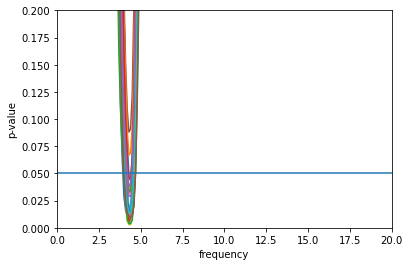

In [16]:
validity = 'valid'
visual_field = 'right'
condition = '60'

# Visualisation & statistics of subject-out analysis
# Calculate statistics - interval label permutations
fig = plt.figure()

for sub_out in subjects:          
    print('For subject-out: '+sub_out)
    # peak at...
    peak_value = sub_out_power_spectrum[sub_out].max()
    freq = sub_out_power_spectrum[sub_out].idxmax()
    print('Peak of '+str(peak_value)+' at '+str(freq)+' Hz.')
    non_corrected = 1 - (stats.percentileofscore(sub_out_interval_permutations[sub_out].loc[freq],peak_value)/100)
    print('Non corrected p:'+str(non_corrected))
    max_based = 1 - (stats.percentileofscore(sub_out_interval_permutations[sub_out].max(axis = 0),peak_value)/100)
    print('Max-based corrected p:'+str(max_based))
    pval = pd.Series(index=sub_out_power_spectrum[sub_out].index,dtype='float64')
    for freq in sub_out_power_spectrum[sub_out].index:
        pval.loc[freq] = 1 - stats.percentileofscore(sub_out_interval_permutations[sub_out].max(axis = 0),sub_out_power_spectrum[sub_out].loc[freq])/100

    print('Significant peak frequencies:')
    print(list(pval[pval <= 0.05].index))
    
    plt.plot(pval)

plt.axhline(0.05)
plt.ylim(0,0.2)
plt.xlim(0,20)
plt.ylabel('p-value')
plt.xlabel('frequency')
plt.show()

In [17]:
# Peak at which frequency?
p = pd.DataFrame()

for sub_out in subjects:  
    # determine peak value 
    peak_value = sub_out_power_spectrum[sub_out].max()
    
    # lowest p-value, uncorrected:
    p.loc[sub_out,'lowest p uncorrected'] = 1 - (stats.percentileofscore(sub_out_interval_permutations[sub_out].loc[freq],peak_value)/100)
    
    # lowest p-value, corrected (Max Based):
    p.loc[sub_out,'lowest p corrected'] = 1 - (stats.percentileofscore(sub_out_interval_permutations[sub_out].max(axis = 0),peak_value)/100)
    
    # at frequency
    p.loc[sub_out,'at frequency'] = sub_out_power_spectrum[sub_out].idxmax()

In [18]:
p

,lowest p uncorrected,lowest p corrected,at frequency
03,0.001,0.006,4.3
04,0.000,0.008,4.4
05,0.000,0.014,4.4
06,0.000,0.034,4.3
09,0.003,0.017,4.3
11,0.003,0.088,4.3
12,0.002,0.033,4.3
14,0.000,0.005,4.4
15,0.001,0.034,4.3
17,0.002,0.019,4.3


In [24]:
# summary
# determine p value range
print('range of p: '+str(round(p['lowest p corrected'].min(),3)) + ' to '+str(round(p['lowest p corrected'].max(),3)))

# determine mean p value
print('mean p: '+str(round(p['lowest p corrected'].mean(),3)))

# frequency range
print('range of frequencies: '+str(round(p['at frequency'].min(),3)) + ' to '+str(round(p['at frequency'].max(),3)))

# p values above 0.05
for sub_out in subjects:
    if p.loc[sub_out,'lowest p corrected'] > 0.05:
        print('participant with p > 0.05 of '+str(round(p.loc[sub_out,'lowest p corrected'],3)))
    

range of p: 0.003 to 0.088
mean p: 0.024
range of frequencies: 4.3 to 4.4
participant with p > 0.05 of 0.088
participant with p > 0.05 of 0.067


The end.